We study the housing in the surrounding of the Greater Toronto Area (GTA) by applying Boosting models

The dataset used can be found on Kaggle in this link:

https://www.kaggle.com/datasets/alankmwong/toronto-home-price-index

In [1]:
import pandas as pd

In [2]:
TH = pd.read_csv('MLS.csv')
TH.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015


In [3]:
TH.shape

(5091, 17)

In [4]:
TH

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,York Region,287.0,970300.0,11.76,292.0,1112000.0,12.65,293.2,847300.0,12.73,271.3,704100.0,11.28,252.2,562700.0,6.91,01/11/2020
5087,York Region,289.5,978700.0,12.56,295.2,1124200.0,13.89,296.3,856200.0,13.66,270.4,701800.0,10.28,253.2,564900.0,6.84,01/12/2020
5088,York Region,294.9,997000.0,13.34,301.7,1148900.0,15.20,302.9,875300.0,14.78,272.6,707500.0,10.14,254.7,568200.0,5.86,01/01/2021
5089,York Region,309.9,1047700.0,17.16,318.6,1213300.0,20.23,322.6,932200.0,20.15,280.7,728500.0,11.04,260.2,580500.0,5.39,01/02/2021


In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
TH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5091 non-null   object 
 1   CompIndex          5076 non-null   float64
 2   CompBenchmark      5076 non-null   float64
 3   CompYoYChange      5076 non-null   float64
 4   SFDetachIndex      5076 non-null   float64
 5   SFDetachBenchmark  5076 non-null   float64
 6   SFDetachYoYChange  5075 non-null   float64
 7   SFAttachIndex      4949 non-null   float64
 8   SFAttachBenchmark  4949 non-null   float64
 9   SFAttachYoYChange  4951 non-null   float64
 10  THouseIndex        3803 non-null   float64
 11  THouseBenchmark    3803 non-null   float64
 12  THouseYoYChange    3804 non-null   float64
 13  ApartIndex         4010 non-null   float64
 14  ApartBenchmark     4010 non-null   float64
 15  ApartYoYChange     4008 non-null   float64
 16  Date               5091 

In [7]:
TH.describe()

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
count,5076.00,5076.00,5076.00,5076.00,5076.00,5075.00,4949.00,4949.00,4951.00,3803.00,3803.00,3804.00,4010.00,4010.00,4008.00
mean,244.87,772049.88,10.22,246.02,948100.06,9.33,247.29,718284.20,9.31,245.17,582943.97,9.47,236.43,483821.97,11.52
std,41.37,272588.17,9.19,41.83,376586.55,10.41,43.12,243377.69,10.11,55.36,221250.44,14.47,52.34,145759.33,9.08
min,135.00,257000.00,-19.58,126.00,259100.00,-21.32,137.20,273300.00,-100.00,0.00,0.00,-100.00,106.00,171400.00,-10.60
25%,217.60,589000.00,4.38,220.30,682200.00,2.25,220.70,542900.00,2.71,210.50,439450.00,4.08,196.62,381925.00,5.64
50%,247.10,726500.00,9.39,246.70,873450.00,8.54,246.70,671600.00,8.76,246.40,555000.00,9.63,239.60,477600.00,9.74
75%,270.50,903300.00,15.38,272.00,1137150.00,15.71,269.90,839900.00,15.37,278.30,673100.00,15.60,272.20,569250.00,15.29
max,409.90,2162900.00,46.78,415.60,2536900.00,49.10,709.00,1677200.00,43.71,466.80,1750500.00,56.49,395.30,1005500.00,64.32


In [8]:
# Find unique values for each column
len_unique = {}
for col in TH.columns:
    len_unique[col]=len(TH[col].unique())
len_unique

{'Location': 77,
 'CompIndex': 1600,
 'CompBenchmark': 3680,
 'CompYoYChange': 2615,
 'SFDetachIndex': 1636,
 'SFDetachBenchmark': 3937,
 'SFDetachYoYChange': 2797,
 'SFAttachIndex': 1574,
 'SFAttachBenchmark': 3541,
 'SFAttachYoYChange': 2702,
 'THouseIndex': 1598,
 'THouseBenchmark': 2730,
 'THouseYoYChange': 2212,
 'ApartIndex': 1681,
 'ApartBenchmark': 2773,
 'ApartYoYChange': 2173,
 'Date': 69}

array([[<AxesSubplot:title={'center':'CompIndex'}>,
        <AxesSubplot:title={'center':'CompBenchmark'}>,
        <AxesSubplot:title={'center':'CompYoYChange'}>,
        <AxesSubplot:title={'center':'SFDetachIndex'}>],
       [<AxesSubplot:title={'center':'SFDetachBenchmark'}>,
        <AxesSubplot:title={'center':'SFDetachYoYChange'}>,
        <AxesSubplot:title={'center':'SFAttachIndex'}>,
        <AxesSubplot:title={'center':'SFAttachBenchmark'}>],
       [<AxesSubplot:title={'center':'SFAttachYoYChange'}>,
        <AxesSubplot:title={'center':'THouseIndex'}>,
        <AxesSubplot:title={'center':'THouseBenchmark'}>,
        <AxesSubplot:title={'center':'THouseYoYChange'}>],
       [<AxesSubplot:title={'center':'ApartIndex'}>,
        <AxesSubplot:title={'center':'ApartBenchmark'}>,
        <AxesSubplot:title={'center':'ApartYoYChange'}>, <AxesSubplot:>]],
      dtype=object)

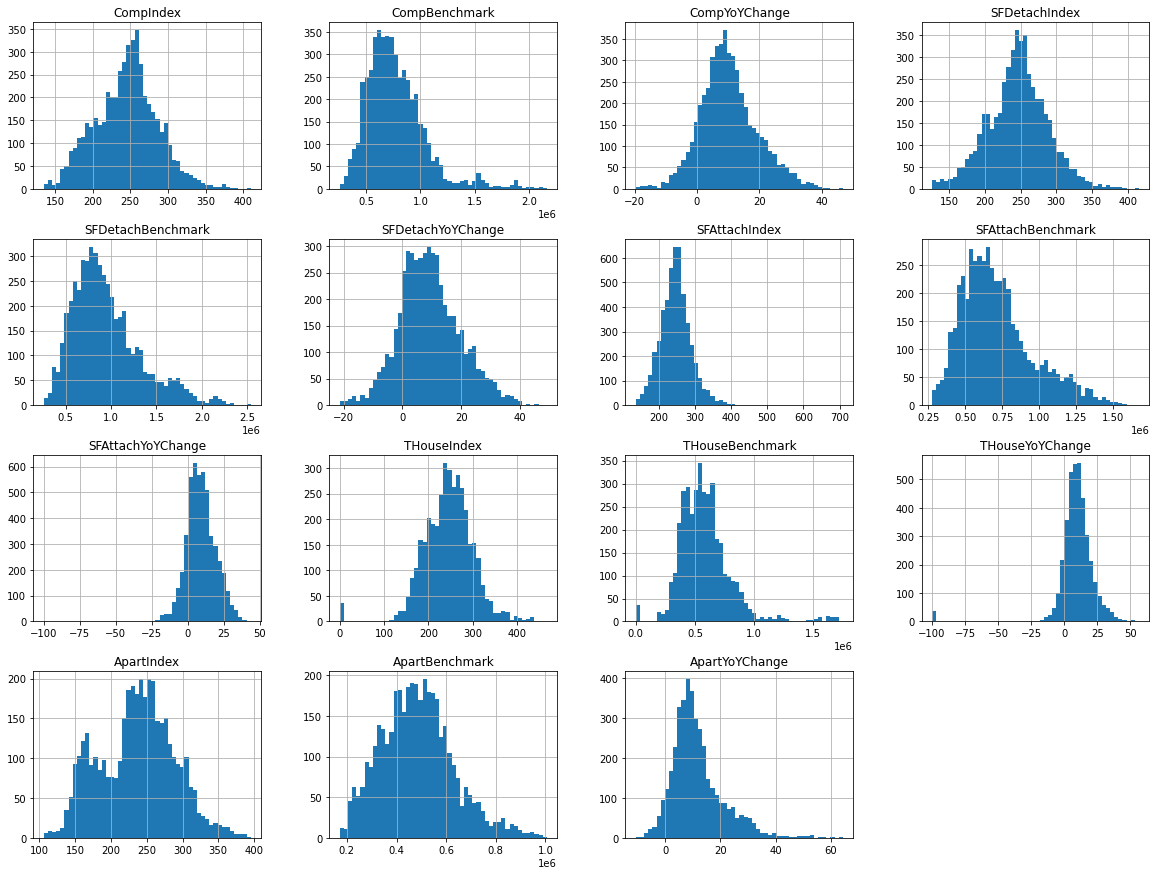

In [9]:
# only in a Jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
TH.hist(bins=50, figsize=(20, 15))

There are 5 types of housing:  
    - Composite  
    - Single Family Detached Houses  
    - Single Family Attached Houses  
    - Town Houses  
    - Appartment/Condominium  

Some areas/locations don't have Single Family Attached Houses, Town Houses, and Apartment/Condominium. That is why we will exclude the related columns in this analysis. We will focus mainly on Detached Houses data.  

Another optimization to analyse the excluded types of housing will have to exclude areas that don't have these types, in order to reduce data.   

Since Composite takes in consideration all type of housing, we will study it only for areas that have all types of housing.

The related columns to Composite are: 'CompIndex', 'CompBenchmark', 'CompYoYChange'  
The related columns to Single Family Detached Houses (SFDH) are: 'SFDetachIndex', 'SFDetachBenchmark', 'SFDetachYoYChange'  
The related columns to Single Family Attached Houses (SFAH) are: 'SFAttachIndex', 'SFAttachBenchmark', 'SFAttachYoYChange'  
The related columns to Town Houses (TH) are: 'THouseIndex', 'THouseBenchmark', 'THouseYoYChange'  
The related columns to Appartment/Condominium (Apart) are: 'ApartIndex', 'ApartBenchmark','ApartYoYChange'  

In [10]:
# We remove the area Barrie from the dataset because it contains no data for all types of housing
THB = TH[TH['Location'] != 'Barrie']

In [11]:
THB.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.70,510000.00,12.00,143.70,510000.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
1,Adjala-Tosorontio,140.80,499700.00,13.82,140.80,499700.00,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
2,Adjala-Tosorontio,142.70,506400.00,15.83,142.70,506400.00,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
3,Adjala-Tosorontio,138.40,491100.00,11.08,138.40,491100.00,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
4,Adjala-Tosorontio,145.40,516000.00,16.51,145.40,516000.00,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015


In [12]:
from sklearn.model_selection import train_test_split

1 - We study the Single Family Detached Houses

In [13]:
# Features variables
SFDH_features = ['Location', 'CompIndex', 'CompBenchmark', 'CompYoYChange', 
                 'SFDetachBenchmark', 'SFDetachYoYChange', 'Date']
# Target variable: SFDH Index
SFDH_target = ['SFDetachIndex']

In [14]:
THBv = THB[['Location', 'CompIndex', 'CompBenchmark', 'CompYoYChange', 
          'SFDetachBenchmark', 'SFDetachYoYChange', 'SFDetachIndex', 'Date']]
THBv

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,SFDetachIndex,Date
0,Adjala-Tosorontio,143.70,510000.00,12.00,510000.00,12.00,143.70,01/07/2015
1,Adjala-Tosorontio,140.80,499700.00,13.82,499700.00,13.82,140.80,01/08/2015
2,Adjala-Tosorontio,142.70,506400.00,15.83,506400.00,15.83,142.70,01/09/2015
3,Adjala-Tosorontio,138.40,491100.00,11.08,491100.00,11.08,138.40,01/10/2015
4,Adjala-Tosorontio,145.40,516000.00,16.51,516000.00,16.51,145.40,01/11/2015
...,...,...,...,...,...,...,...,...
5086,York Region,287.00,970300.00,11.76,1112000.00,12.65,292.00,01/11/2020
5087,York Region,289.50,978700.00,12.56,1124200.00,13.89,295.20,01/12/2020
5088,York Region,294.90,997000.00,13.34,1148900.00,15.20,301.70,01/01/2021
5089,York Region,309.90,1047700.00,17.16,1213300.00,20.23,318.60,01/02/2021


In [15]:
# We check if there is any missing value
THBv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 0 to 5090
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5076 non-null   object 
 1   CompIndex          5076 non-null   float64
 2   CompBenchmark      5076 non-null   float64
 3   CompYoYChange      5076 non-null   float64
 4   SFDetachBenchmark  5076 non-null   float64
 5   SFDetachYoYChange  5075 non-null   float64
 6   SFDetachIndex      5076 non-null   float64
 7   Date               5076 non-null   object 
dtypes: float64(6), object(2)
memory usage: 356.9+ KB


In [16]:
nan_values = THBv['SFDetachYoYChange'].isna()
THBv[nan_values]

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,SFDetachIndex,Date
2607,Toronto C04,247.80,1529300.00,1.60,1738100.00,NaN,246.70,01/01/2020


In [17]:
THBv[(THBv['Date'] == '2019-01-01') & (THBv['Location'] == 'Toronto C04')]

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,SFDetachIndex,Date


In [18]:
THB[THB.index==2607].SFDetachBenchmark

2607   1738100.00
Name: SFDetachBenchmark, dtype: float64

In [19]:
#THB.loc[2607].SFDetachYoYChange
#THB[THB.index==2607].SFDetachYoYChange
#THB.loc[index_to_change, column_name]
THB.loc[2607, 'SFDetachYoYChange'] = ((THB.loc[2607, 'SFDetachBenchmark'] - 
                                      THB.loc[2595, 'SFDetachBenchmark'])/THB.loc[2607, 'SFDetachBenchmark'])*100
THB[THB.index==2607]

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
2607,Toronto C04,247.80,1529300.00,1.60,246.70,1738100.00,0.00,251.20,1176000.00,3.42,NaN,NaN,NaN,245.50,567800.00,7.02,01/01/2020


In [20]:
THB

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.70,510000.00,12.00,143.70,510000.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
1,Adjala-Tosorontio,140.80,499700.00,13.82,140.80,499700.00,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
2,Adjala-Tosorontio,142.70,506400.00,15.83,142.70,506400.00,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
3,Adjala-Tosorontio,138.40,491100.00,11.08,138.40,491100.00,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
4,Adjala-Tosorontio,145.40,516000.00,16.51,145.40,516000.00,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,York Region,287.00,970300.00,11.76,292.00,1112000.00,12.65,293.20,847300.00,12.73,271.30,704100.00,11.28,252.20,562700.00,6.91,01/11/2020
5087,York Region,289.50,978700.00,12.56,295.20,1124200.00,13.89,296.30,856200.00,13.66,270.40,701800.00,10.28,253.20,564900.00,6.84,01/12/2020
5088,York Region,294.90,997000.00,13.34,301.70,1148900.00,15.20,302.90,875300.00,14.78,272.60,707500.00,10.14,254.70,568200.00,5.86,01/01/2021
5089,York Region,309.90,1047700.00,17.16,318.60,1213300.00,20.23,322.60,932200.00,20.15,280.70,728500.00,11.04,260.20,580500.00,5.39,01/02/2021


In [21]:
X_SFDH = THB[['Location', 'CompIndex', 'CompBenchmark', 'CompYoYChange', 
             'SFDetachBenchmark', 'SFDetachYoYChange', 'Date']]
y_SFDH = THB['SFDetachIndex']

In [22]:
X_SFDH.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachBenchmark,SFDetachYoYChange,Date
0,Adjala-Tosorontio,143.70,510000.00,12.00,510000.00,12.00,01/07/2015
1,Adjala-Tosorontio,140.80,499700.00,13.82,499700.00,13.82,01/08/2015
2,Adjala-Tosorontio,142.70,506400.00,15.83,506400.00,15.83,01/09/2015
3,Adjala-Tosorontio,138.40,491100.00,11.08,491100.00,11.08,01/10/2015
4,Adjala-Tosorontio,145.40,516000.00,16.51,516000.00,16.51,01/11/2015


In [23]:
y_SFDH.head()

0   143.70
1   140.80
2   142.70
3   138.40
4   145.40
Name: SFDetachIndex, dtype: float64

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [25]:
Num_SFDH = ['CompIndex', 'CompBenchmark', 'CompYoYChange', 'SFDetachBenchmark', 'SFDetachYoYChange']
Cat_SFDH = ['Location', 'Date']

Num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

Cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', Num_transformer, Num_SFDH),
    ('cat', Cat_transformer, Cat_SFDH)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_SFDH_transformed = pipeline.fit_transform(X_SFDH)

In [26]:
from sklearn.model_selection import train_test_split

# Assuming y is your target variable
X_SFDH_train, X_SFDH_test, y_SFDH_train, y_SFDH_test = train_test_split(X_SFDH_transformed, y_SFDH, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'base_estimator__max_depth': [1, 3, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0]
}
base_regressor = DecisionTreeRegressor()
grid_search = GridSearchCV(AdaBoostRegressor(base_regressor, random_state=42), param_grid, cv=5)
grid_search.fit(X_SFDH_train, y_SFDH_train)

# Get the best parameters
best_params = grid_search.best_params_

In [29]:
print(best_params)

{'base_estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estimators': 300}


In [30]:
best_params

{'base_estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estimators': 300}

In [31]:
# Create the final model with the best parameters
final_ada_regressor = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=best_params['base_estimator__max_depth']),
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Fit the final model on the training data
final_ada_regressor.fit(X_SFDH_train, y_SFDH_train)

# Make predictions on the test set
predictions = final_ada_regressor.predict(X_SFDH_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_SFDH_test, predictions)

In [32]:
print(f"Final Model MSE: {mse}")

Final Model MSE: 111.40855972908558


2 - We will now consider the index for Single Family Detached Housing (SFDH) for areas that contain all types of housing.  
Therefore, we will exclude areas where some types of housing doesn't exist. The type of housing that cannot be found in some areas, espescially remote ones, are:
- Single Family Attached Houses (SFAH)  
- Town Houses (TH)  
- Appartment/Condominium (Apart)

In [33]:
THB

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.70,510000.00,12.00,143.70,510000.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
1,Adjala-Tosorontio,140.80,499700.00,13.82,140.80,499700.00,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
2,Adjala-Tosorontio,142.70,506400.00,15.83,142.70,506400.00,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
3,Adjala-Tosorontio,138.40,491100.00,11.08,138.40,491100.00,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
4,Adjala-Tosorontio,145.40,516000.00,16.51,145.40,516000.00,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,York Region,287.00,970300.00,11.76,292.00,1112000.00,12.65,293.20,847300.00,12.73,271.30,704100.00,11.28,252.20,562700.00,6.91,01/11/2020
5087,York Region,289.50,978700.00,12.56,295.20,1124200.00,13.89,296.30,856200.00,13.66,270.40,701800.00,10.28,253.20,564900.00,6.84,01/12/2020
5088,York Region,294.90,997000.00,13.34,301.70,1148900.00,15.20,302.90,875300.00,14.78,272.60,707500.00,10.14,254.70,568200.00,5.86,01/01/2021
5089,York Region,309.90,1047700.00,17.16,318.60,1213300.00,20.23,322.60,932200.00,20.15,280.70,728500.00,11.04,260.20,580500.00,5.39,01/02/2021


In [34]:
# Locations with all housing types
THB_AHT = THB.groupby('Location').filter(lambda group: any(pd.notna(group['SFAttachIndex'])))
THB_AHT

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
69,Ajax,179.80,444300.00,16.00,178.80,478900.00,17.86,187.10,402400.00,15.64,170.50,311600.00,18.16,148.70,252500.00,5.61,01/07/2015
70,Ajax,180.40,445800.00,16.31,179.20,480000.00,15.76,187.60,403500.00,16.81,170.40,311400.00,15.76,151.50,257200.00,8.99,01/08/2015
71,Ajax,182.80,451700.00,15.55,181.40,485800.00,15.10,190.10,408800.00,15.99,172.30,314900.00,14.33,154.30,262000.00,10.53,01/09/2015
72,Ajax,183.80,454200.00,15.74,182.30,488300.00,14.51,191.20,411200.00,15.95,177.10,323700.00,17.13,152.40,258800.00,8.70,01/10/2015
73,Ajax,182.10,450000.00,12.69,180.30,482900.00,11.99,190.30,409300.00,13.14,173.10,316300.00,12.99,151.20,256700.00,5.00,01/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,York Region,287.00,970300.00,11.76,292.00,1112000.00,12.65,293.20,847300.00,12.73,271.30,704100.00,11.28,252.20,562700.00,6.91,01/11/2020
5087,York Region,289.50,978700.00,12.56,295.20,1124200.00,13.89,296.30,856200.00,13.66,270.40,701800.00,10.28,253.20,564900.00,6.84,01/12/2020
5088,York Region,294.90,997000.00,13.34,301.70,1148900.00,15.20,302.90,875300.00,14.78,272.60,707500.00,10.14,254.70,568200.00,5.86,01/01/2021
5089,York Region,309.90,1047700.00,17.16,318.60,1213300.00,20.23,322.60,932200.00,20.15,280.70,728500.00,11.04,260.20,580500.00,5.39,01/02/2021


In [35]:
THB_AHT[THB_AHT['SFAttachIndex'].isna()]

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
360,Brock,136.00,257000.00,0.29,136.80,259100.00,0.29,NaN,NaN,-100.00,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
361,Brock,138.20,261200.00,3.21,138.80,262800.00,2.89,NaN,NaN,-100.00,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
362,Brock,140.70,265900.00,6.59,141.50,268000.00,6.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
363,Brock,141.50,267400.00,8.18,142.00,268900.00,8.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
364,Brock,141.80,268000.00,6.78,141.70,268300.00,6.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015
365,Brock,143.00,270200.00,6.64,143.60,271900.00,6.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/12/2015
366,Brock,143.30,270800.00,9.56,139.70,264600.00,6.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2016
367,Brock,145.80,275600.00,12.07,146.60,277700.00,11.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/02/2016
368,Brock,148.30,280300.00,12.69,149.30,282800.00,12.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/03/2016
369,Brock,152.70,288600.00,13.45,153.60,290900.00,13.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/04/2016


In [36]:
import numpy as np

# -100 is an oulier value that we replace by None
THB_AHT.replace(-100, np.nan, inplace=True)

In [37]:
THB_AHT[THB_AHT['Location']=='Brock']

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
360,Brock,136.00,257000.00,0.29,136.80,259100.00,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/07/2015
361,Brock,138.20,261200.00,3.21,138.80,262800.00,2.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/08/2015
362,Brock,140.70,265900.00,6.59,141.50,268000.00,6.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/09/2015
363,Brock,141.50,267400.00,8.18,142.00,268900.00,8.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/10/2015
364,Brock,141.80,268000.00,6.78,141.70,268300.00,6.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brock,264.60,458200.00,20.05,266.40,461600.00,20.22,292.10,500700.00,27.00,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2020
425,Brock,272.10,471200.00,23.63,274.00,474700.00,23.65,306.70,525700.00,25.75,NaN,NaN,NaN,NaN,NaN,NaN,01/12/2020
426,Brock,278.10,481600.00,24.54,280.10,485300.00,24.60,322.90,553400.00,27.78,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021
427,Brock,291.50,504800.00,32.32,293.30,508200.00,32.30,309.80,531000.00,31.66,NaN,NaN,NaN,NaN,NaN,NaN,01/02/2021


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Assuming num_cols contains the names of numerical columns
# and cat_cols contains the names of categorical columns
num_cols = THB_AHT.columns.drop(['Location', 'Date', 'SFDetachIndex'])  # List of numerical column names
cat_cols = ['Location', 'Date']  # List of categorical column names

# Create transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

base_regressor = DecisionTreeRegressor(max_depth=1)

# Create the final pipeline with the preprocessor and the regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', AdaBoostRegressor(base_regressor, n_estimators=200, learning_rate=0.5, random_state=42))])

#X_AHT_transformed = pipeline.fit_transform(X_AHT)

In [39]:
X_SF_AHT = THB_AHT[['Location', 
                 'CompIndex', 'CompBenchmark', 'CompYoYChange',
                 'SFDetachBenchmark', 'SFDetachYoYChange', 
                 'SFAttachIndex', 'SFAttachBenchmark', 'SFAttachYoYChange',
                 'THouseIndex', 'THouseBenchmark', 'THouseYoYChange', 
                 'ApartIndex', 'ApartBenchmark', 'ApartYoYChange',
                 'Date']]
y_SF_AHT = THB_AHT['SFDetachIndex']

In [40]:
X_SF_AHT_train, X_SF_AHT_test, y_SF_AHT_train, y_SF_AHT_test = train_test_split(X_SF_AHT, 
                                                                                y_SF_AHT, 
                                                                                test_size=0.2, 
                                                                                random_state=42)

In [41]:
# Fit the entire pipeline on the training data
pipeline.fit(X_SF_AHT_train, y_SF_AHT_train)

# Now the pipeline is fitted, and you can use it for predictions
X_SF_AHT_test_transformed = pipeline.named_steps['preprocessor'].transform(X_SF_AHT_test)
predictions = pipeline.predict(X_SF_AHT_test)
mse = mean_squared_error(y_SF_AHT_test, predictions)

In [42]:
mse

591.8070934534817

In [43]:
# Define the parameter grid for AdaBoostRegressor
param_grid = {
    'regressor__base_estimator__max_depth': [1, 3, 5],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.1, 0.5, 1.0],
    # Add other hyperparameters you want to tune
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_SF_AHT_train, y_SF_AHT_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Now you can use the best estimator for predictions
predictions = best_estimator.predict(X_SF_AHT_test)
mse = mean_squared_error(y_SF_AHT_test, predictions)
print("Mean Squared Error:", mse)


Best Parameters: {'regressor__base_estimator__max_depth': 5, 'regressor__learning_rate': 1.0, 'regressor__n_estimators': 300}
Mean Squared Error: 100.80833179696329


We obtain a much better result when using a Search grid (Single Family Detached houses Index: 591.80 vs. 100.80).  
Also, the result is better when working on a dataset that includes all types of housing and exclude locations that miss 
these types of housing (Single Family Detached houses Index: 100.80 vs. 111.40)

In [44]:
X_SF_AHT_test['Location'].unique()

array(['Toronto W01', 'Scugog', 'Toronto W08', 'Toronto E06',
       'Toronto C12', 'Toronto E11', 'City of Toronto', 'Toronto C01',
       'Toronto E07', 'Essa', 'Oakville', 'Orangeville', 'Bradford West',
       'Toronto W05', 'Brock', 'Toronto E10', 'Toronto C09', 'Brampton',
       'Halton Hills', 'Whitchurch-Stouffville', 'York Region',
       'EGswsiallimbury', 'Georgina', 'Toronto C03', 'Toronto W06',
       'Toronto W03', 'TREB Total', 'Toronto E09', 'Toronto W09',
       'Toronto W07', 'Toronto C15', 'Peel Region', 'Ajax', 'Toronto E08',
       'Uxbridge', 'Toronto C14', 'Toronto W04', 'New Tecumseth',
       'Milton', 'Innisfil', 'Caledon', 'Newmarket', 'Vaughan', 'Oshawa',
       'Aurora', 'Dufferin County', 'Toronto C13', 'East Gwillimbury',
       'Whitby', 'Toronto C10', 'Toronto E04', 'Toronto C08',
       'Bradford West Gwillimbury', 'Toronto E02', 'Markham',
       'Richmond Hill', 'King', 'Clarington', 'Toronto W02', 'Burlington',
       'Durham Region', 'Toronto C02'

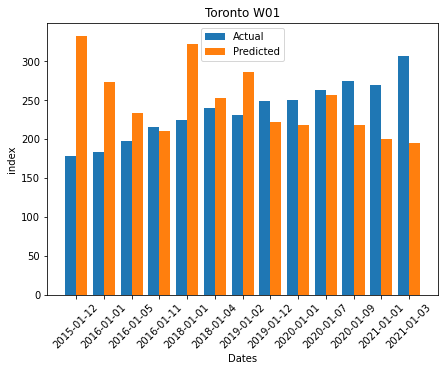

Actual avg:  237.04 , Predicted avg:  247.76


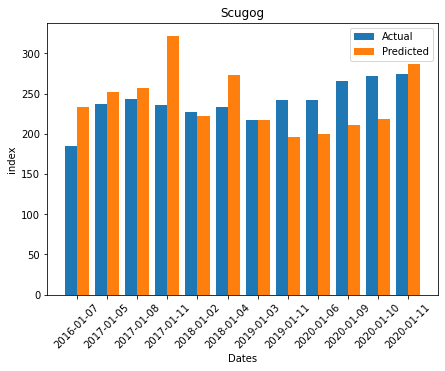

Actual avg:  239.50 , Predicted avg:  240.67


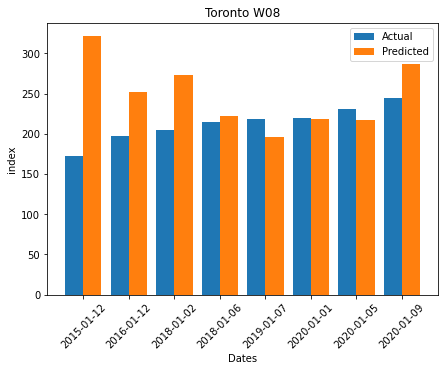

Actual avg:  212.79 , Predicted avg:  248.40


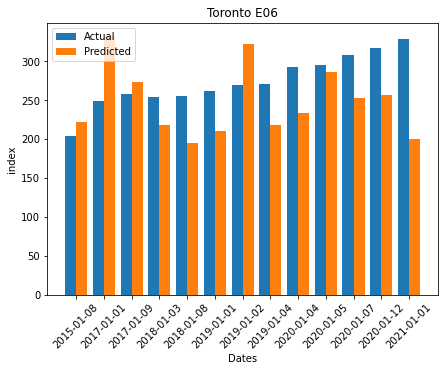

Actual avg:  274.05 , Predicted avg:  247.76


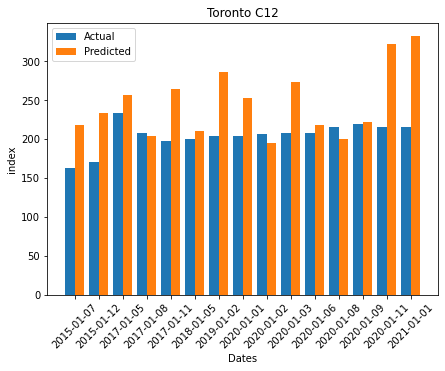

Actual avg:  204.24 , Predicted avg:  245.87


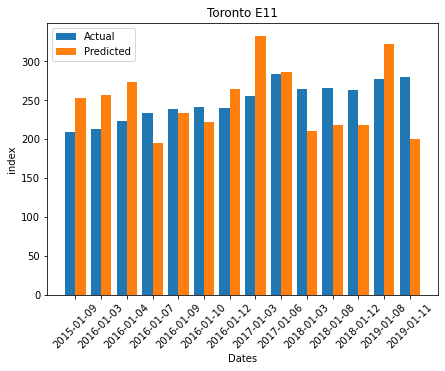

Actual avg:  248.94 , Predicted avg:  248.90


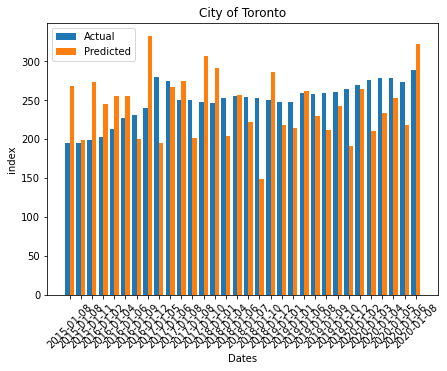

Actual avg:  249.29 , Predicted avg:  242.28


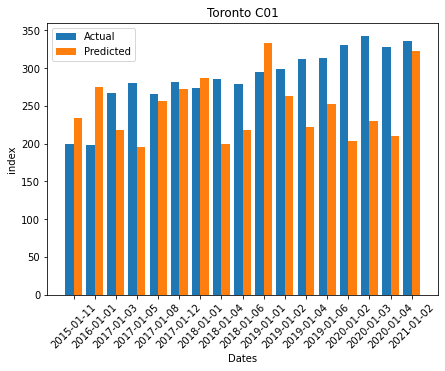

Actual avg:  287.51 , Predicted avg:  246.59


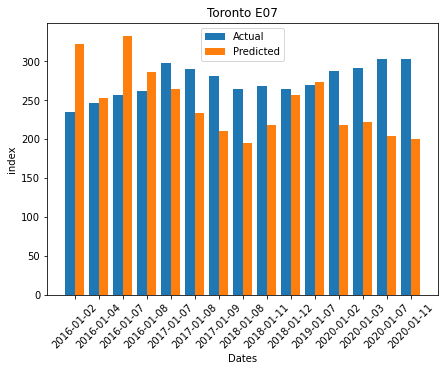

Actual avg:  274.80 , Predicted avg:  245.87


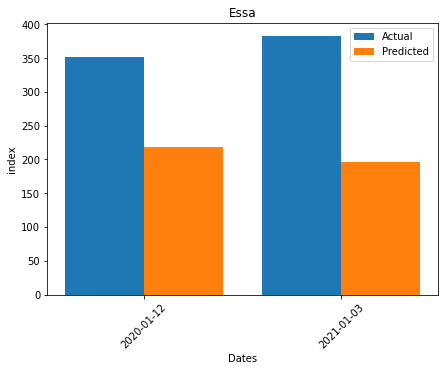

Actual avg:  367.65 , Predicted avg:  206.86


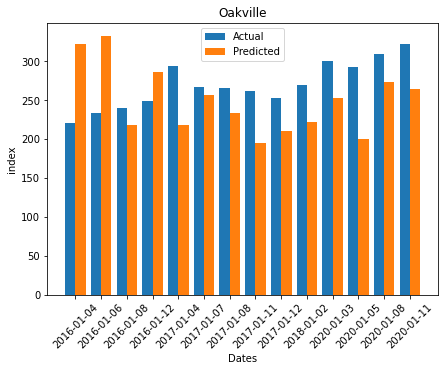

Actual avg:  269.97 , Predicted avg:  248.90


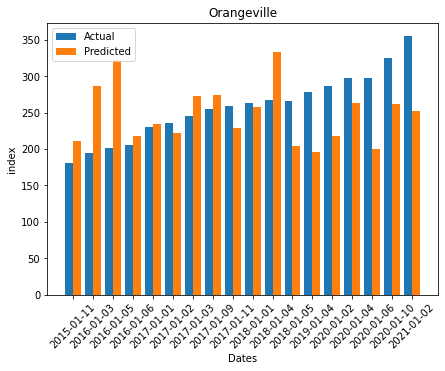

Actual avg:  257.97 , Predicted avg:  247.46


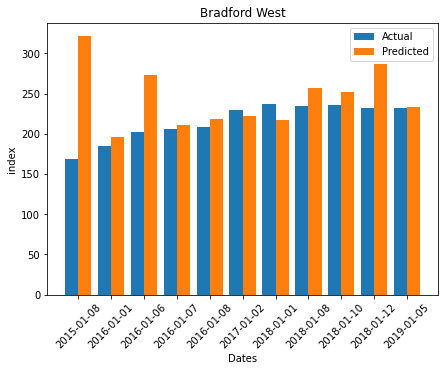

Actual avg:  215.64 , Predicted avg:  244.42


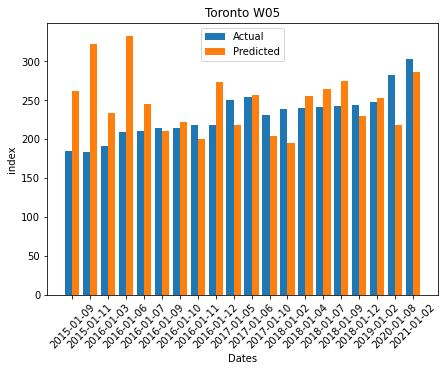

Actual avg:  230.85 , Predicted avg:  247.79


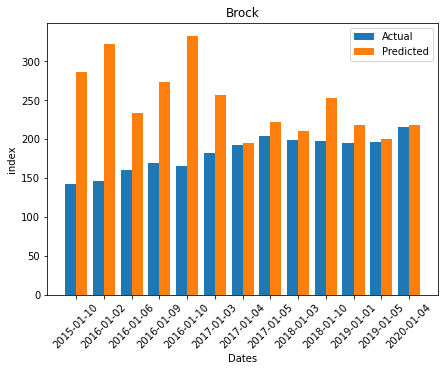

Actual avg:  181.81 , Predicted avg:  247.76


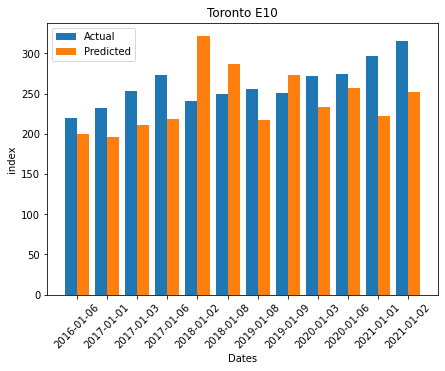

Actual avg:  261.23 , Predicted avg:  240.67


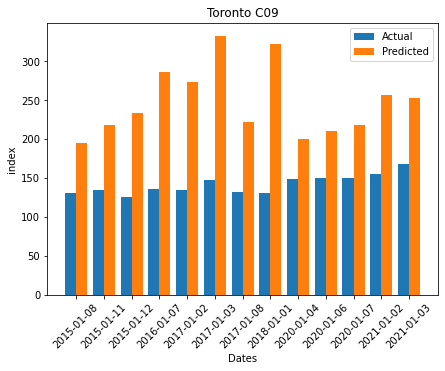

Actual avg:  141.68 , Predicted avg:  247.76


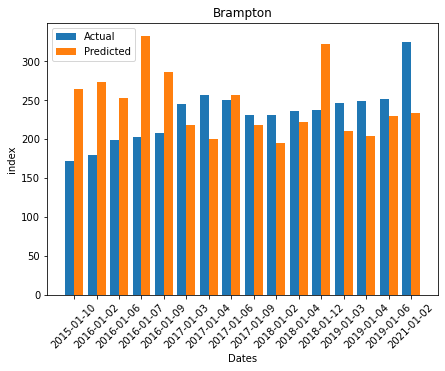

Actual avg:  232.34 , Predicted avg:  244.84


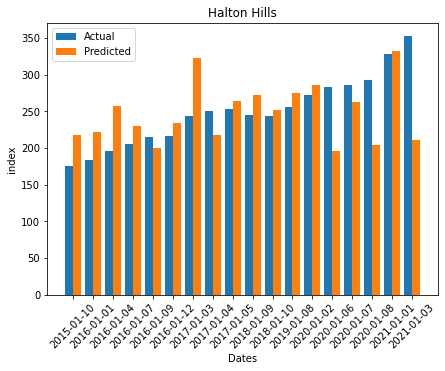

Actual avg:  249.73 , Predicted avg:  247.46


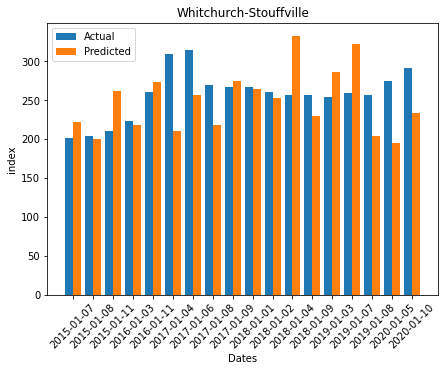

Actual avg:  257.57 , Predicted avg:  247.46


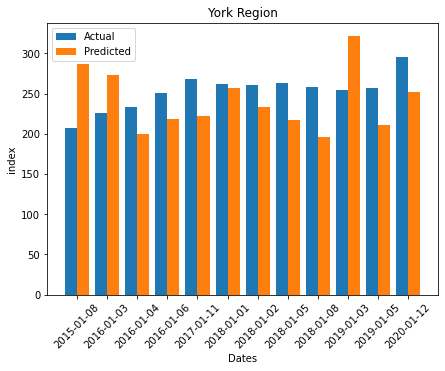

Actual avg:  252.96 , Predicted avg:  240.67


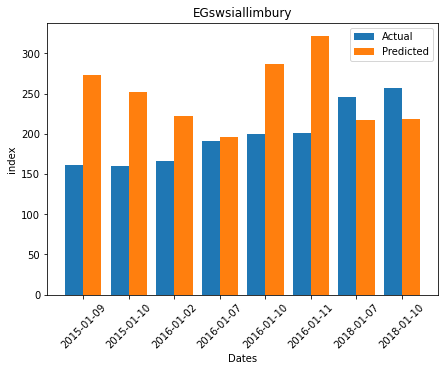

Actual avg:  197.93 , Predicted avg:  248.40


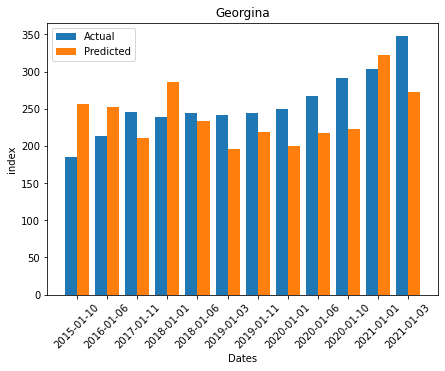

Actual avg:  256.18 , Predicted avg:  240.67


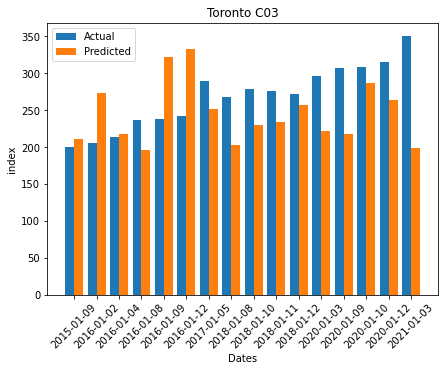

Actual avg:  268.69 , Predicted avg:  244.84


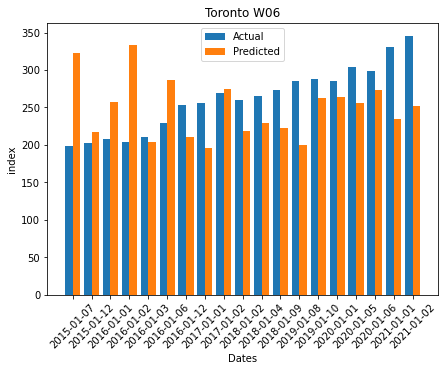

Actual avg:  261.35 , Predicted avg:  247.90


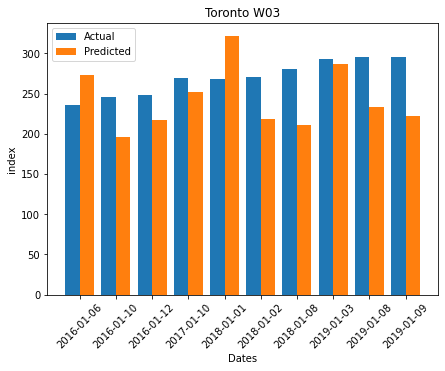

Actual avg:  270.43 , Predicted avg:  243.16


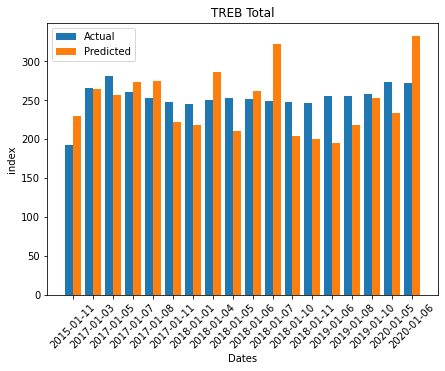

Actual avg:  253.08 , Predicted avg:  247.46


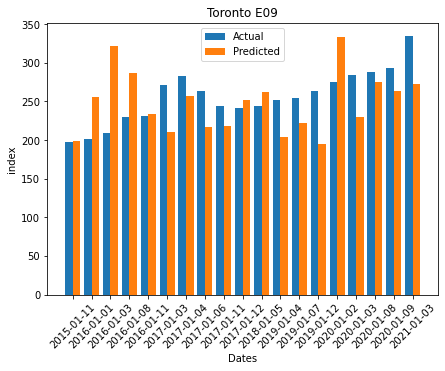

Actual avg:  255.83 , Predicted avg:  247.90


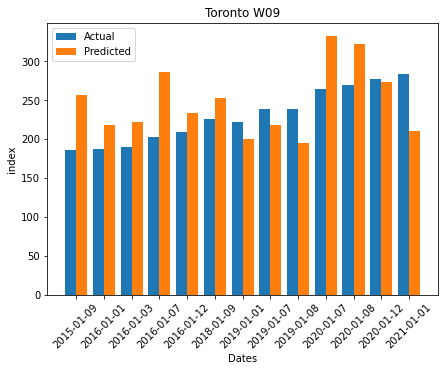

Actual avg:  230.28 , Predicted avg:  247.76


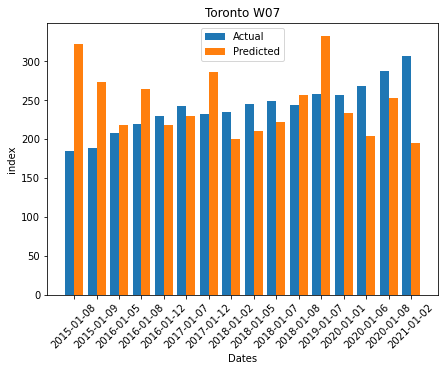

Actual avg:  240.65 , Predicted avg:  244.84


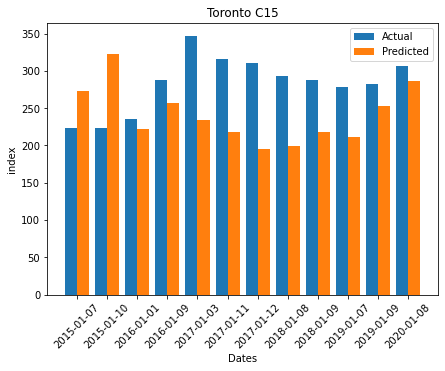

Actual avg:  282.53 , Predicted avg:  240.67


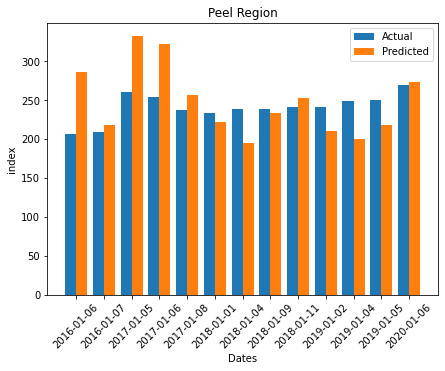

Actual avg:  240.72 , Predicted avg:  247.76


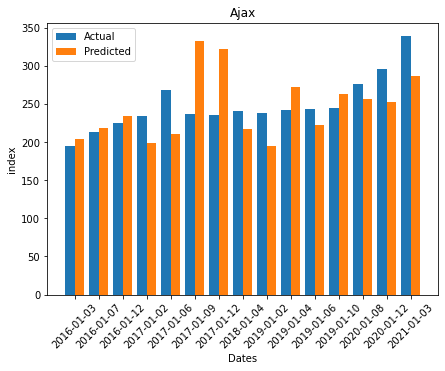

Actual avg:  248.64 , Predicted avg:  245.87


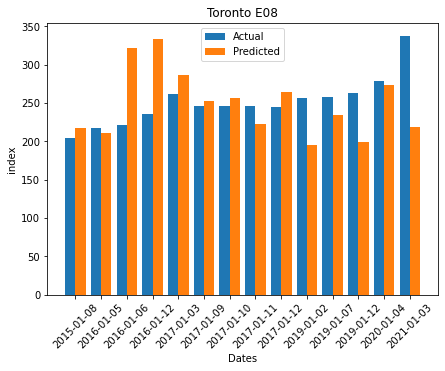

Actual avg:  251.07 , Predicted avg:  248.90


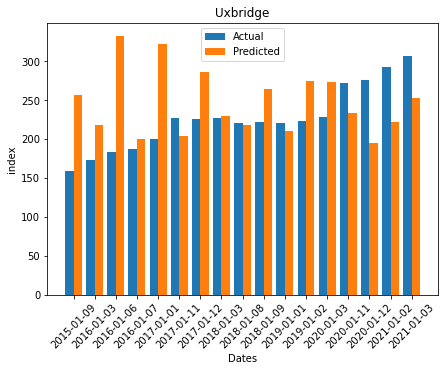

Actual avg:  226.01 , Predicted avg:  246.59


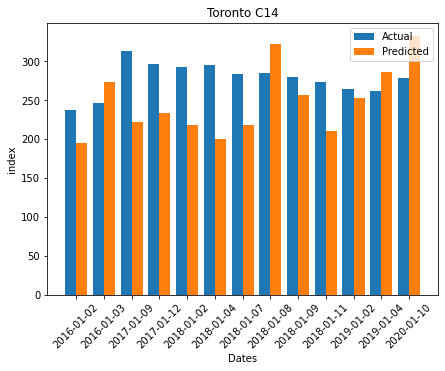

Actual avg:  277.31 , Predicted avg:  247.76


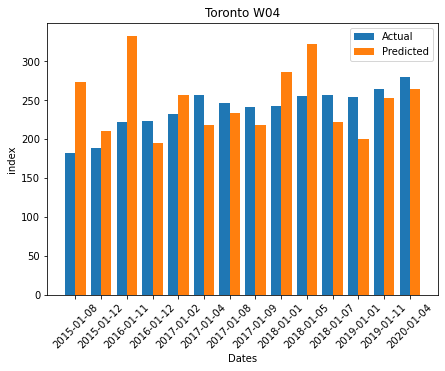

Actual avg:  238.84 , Predicted avg:  248.90


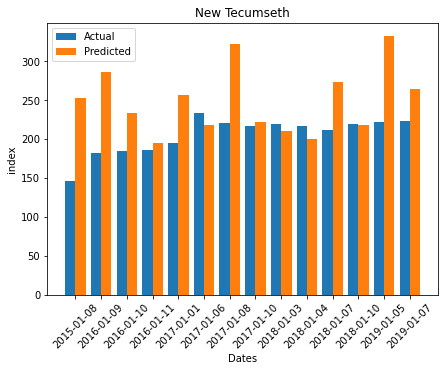

Actual avg:  205.55 , Predicted avg:  248.90


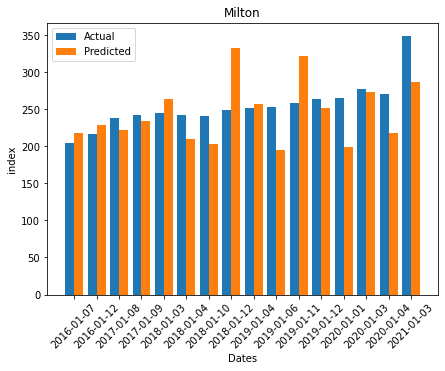

Actual avg:  254.28 , Predicted avg:  244.84


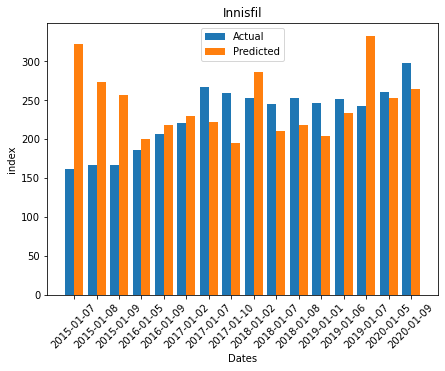

Actual avg:  230.25 , Predicted avg:  244.84


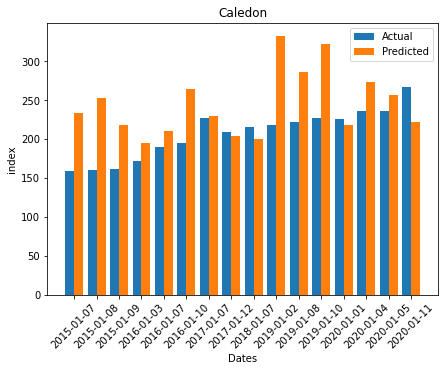

Actual avg:  207.56 , Predicted avg:  244.84


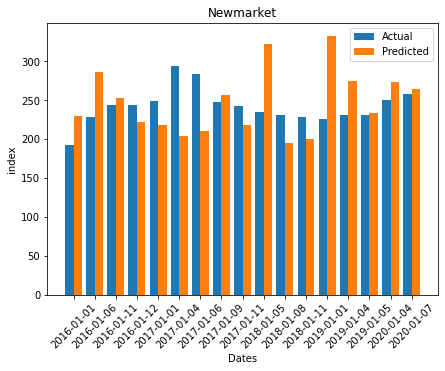

Actual avg:  242.02 , Predicted avg:  246.59


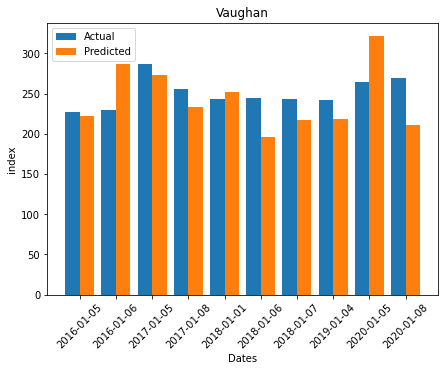

Actual avg:  250.73 , Predicted avg:  243.16


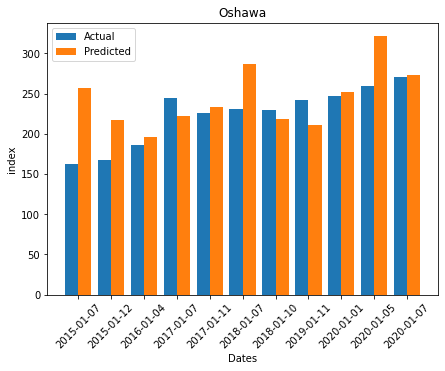

Actual avg:  224.21 , Predicted avg:  244.42


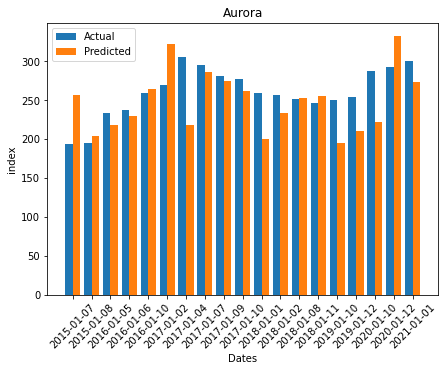

Actual avg:  260.18 , Predicted avg:  247.90


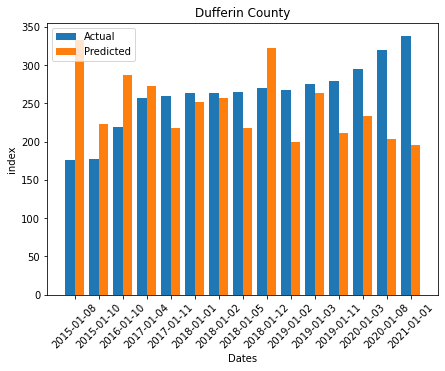

Actual avg:  261.60 , Predicted avg:  245.87


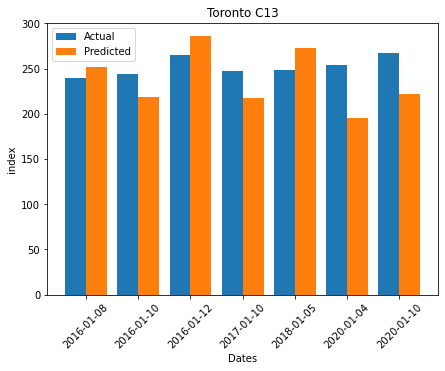

Actual avg:  252.16 , Predicted avg:  237.87


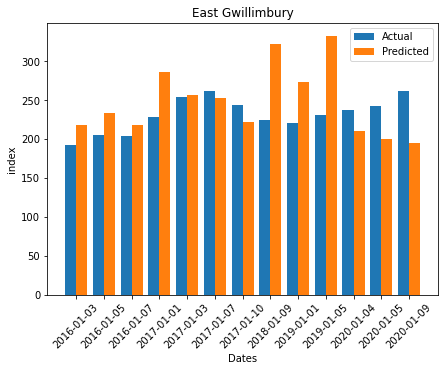

Actual avg:  231.25 , Predicted avg:  247.76


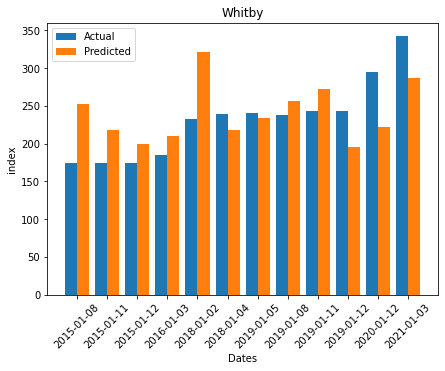

Actual avg:  231.83 , Predicted avg:  240.67


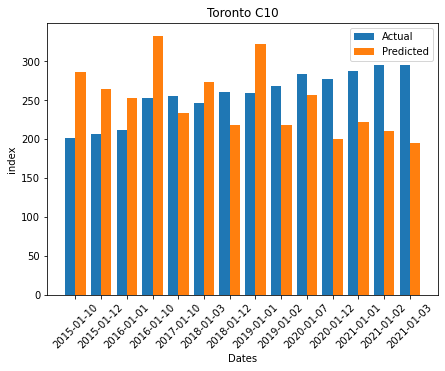

Actual avg:  257.11 , Predicted avg:  248.90


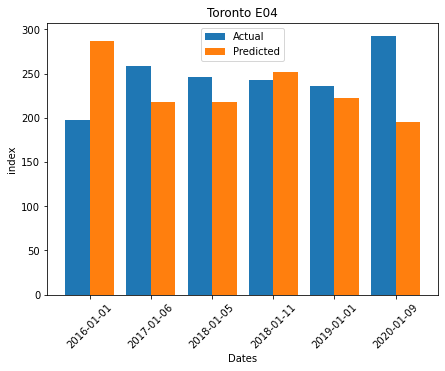

Actual avg:  245.47 , Predicted avg:  232.04


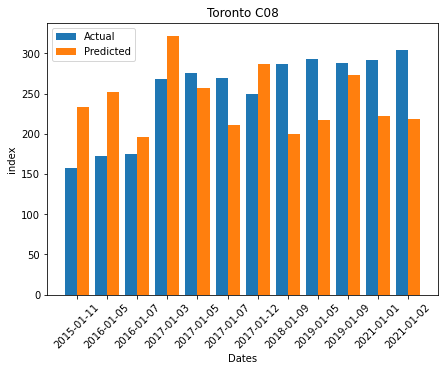

Actual avg:  252.85 , Predicted avg:  240.67


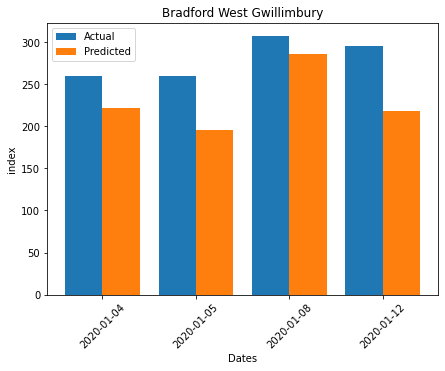

Actual avg:  281.23 , Predicted avg:  230.63


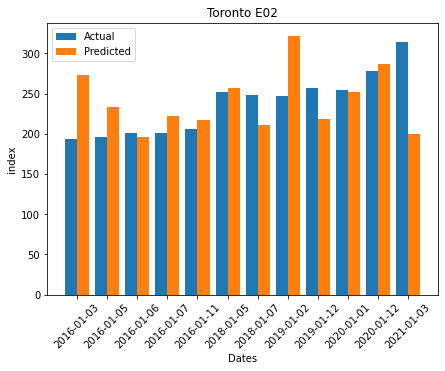

Actual avg:  237.32 , Predicted avg:  240.67


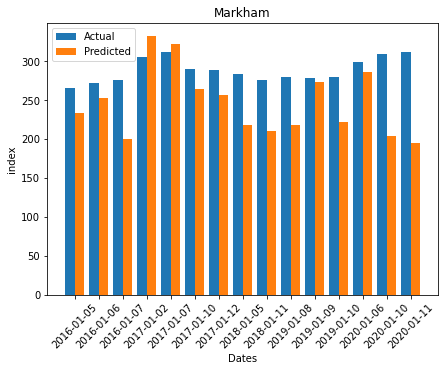

Actual avg:  288.38 , Predicted avg:  245.87


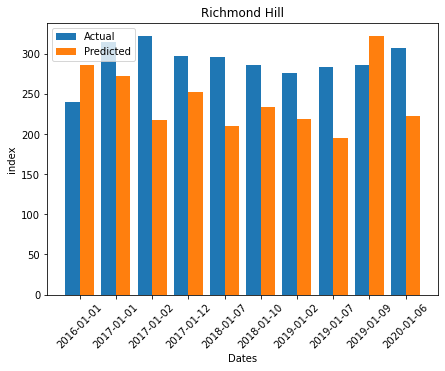

Actual avg:  291.12 , Predicted avg:  243.16


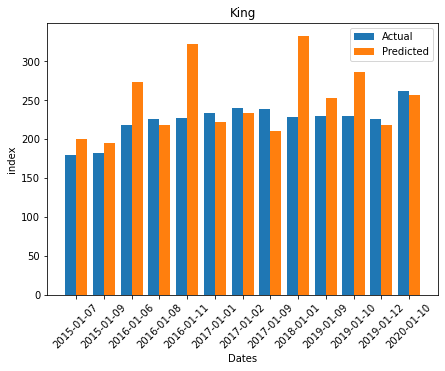

Actual avg:  224.60 , Predicted avg:  247.76


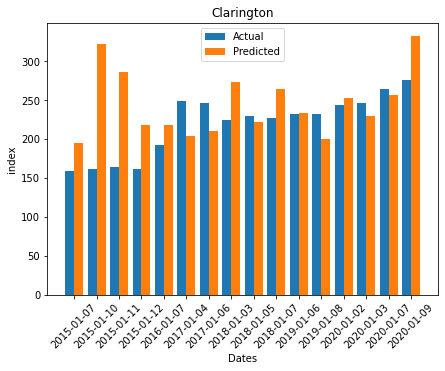

Actual avg:  219.23 , Predicted avg:  244.84


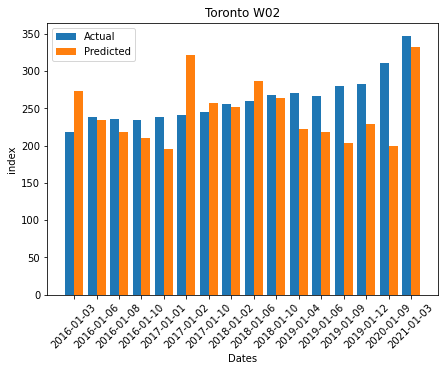

Actual avg:  261.92 , Predicted avg:  244.84


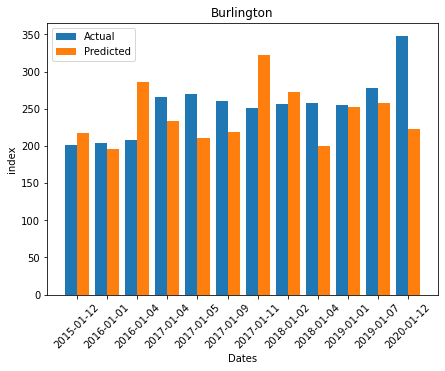

Actual avg:  254.52 , Predicted avg:  240.67


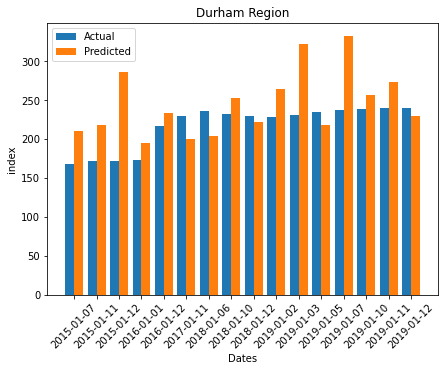

Actual avg:  217.44 , Predicted avg:  244.84


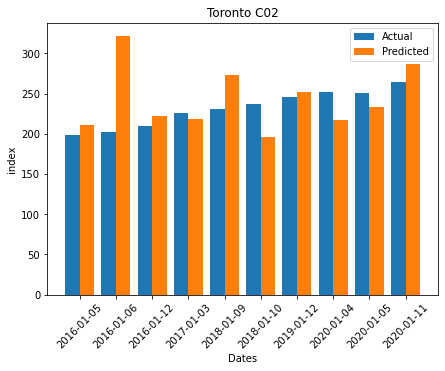

Actual avg:  231.78 , Predicted avg:  243.16


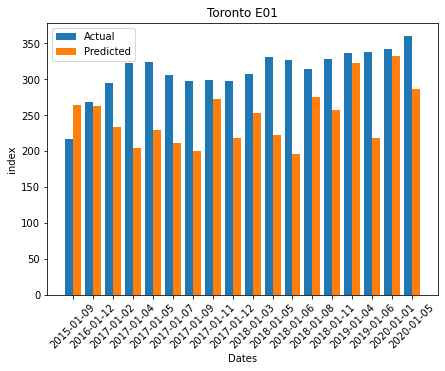

Actual avg:  311.84 , Predicted avg:  247.46


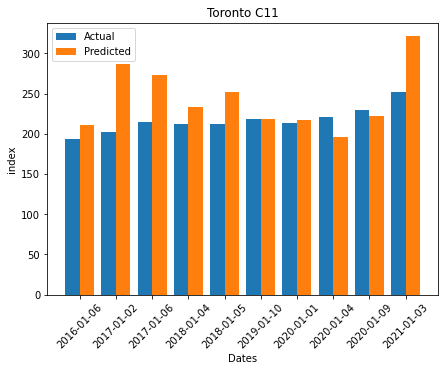

Actual avg:  217.08 , Predicted avg:  243.16


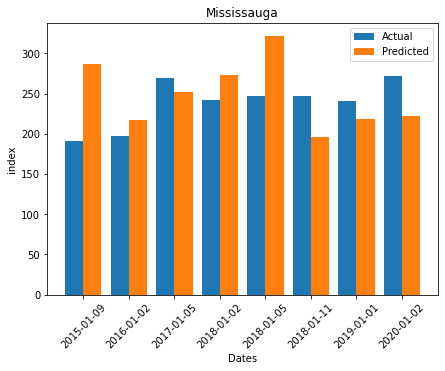

Actual avg:  238.34 , Predicted avg:  248.40


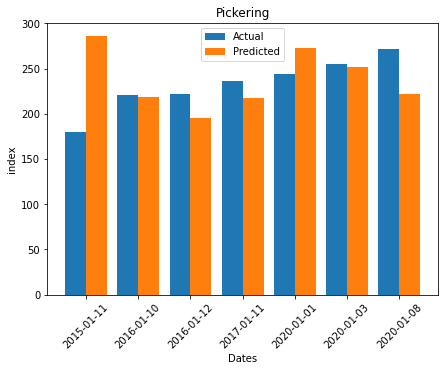

Actual avg:  232.87 , Predicted avg:  237.87


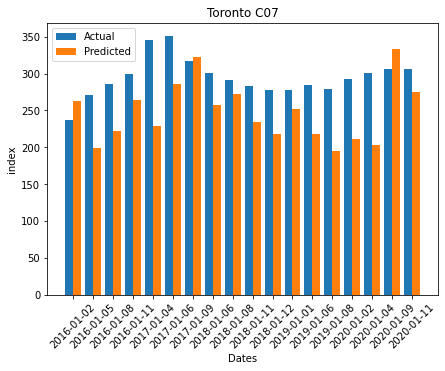

Actual avg:  294.91 , Predicted avg:  247.46


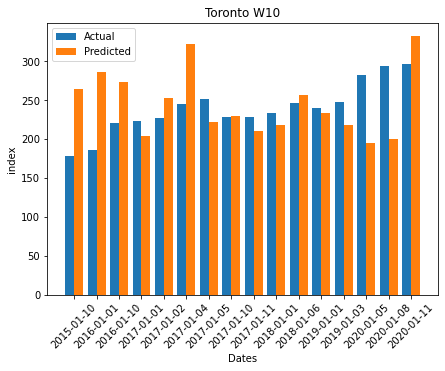

Actual avg:  239.31 , Predicted avg:  244.84


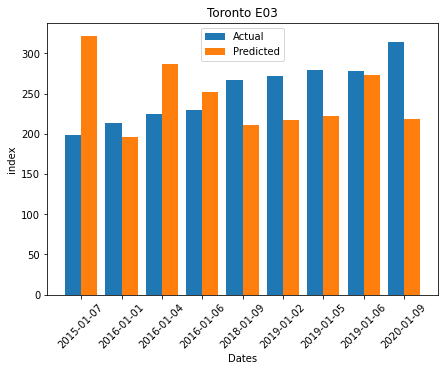

Actual avg:  253.14 , Predicted avg:  244.19


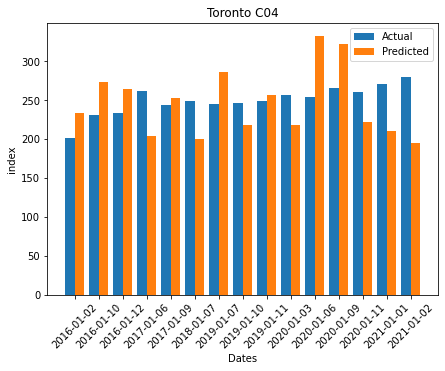

Actual avg:  249.93 , Predicted avg:  245.87


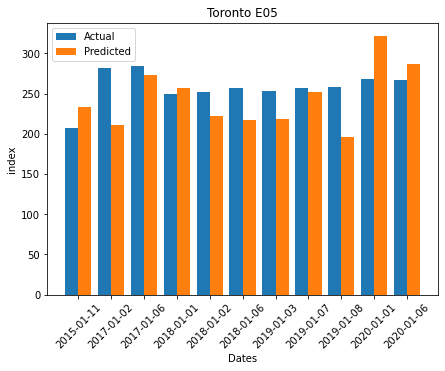

Actual avg:  257.75 , Predicted avg:  244.42


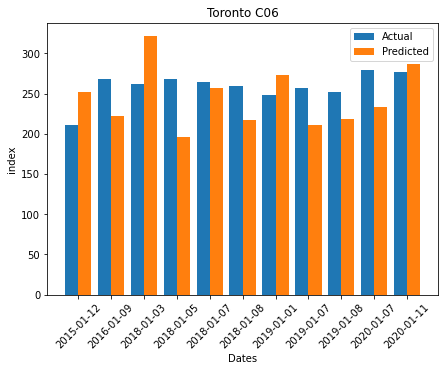

Actual avg:  258.64 , Predicted avg:  244.42


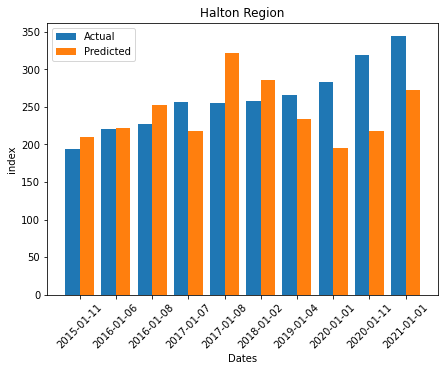

Actual avg:  262.73 , Predicted avg:  243.16


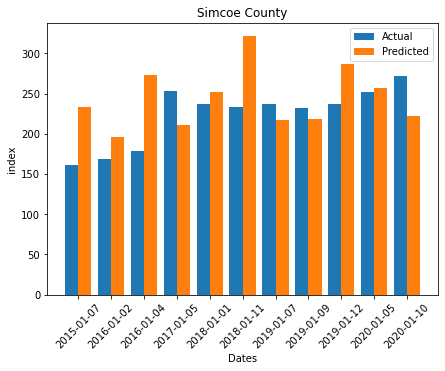

Actual avg:  223.69 , Predicted avg:  244.42


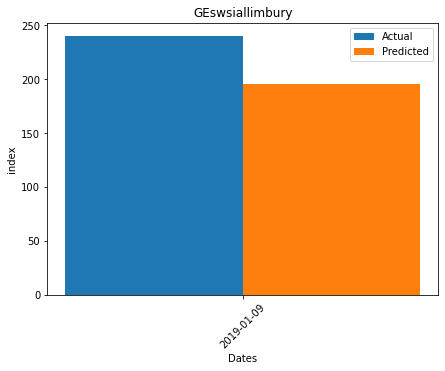

Actual avg:  240.50 , Predicted avg:  195.43


In [201]:
import datetime

# Comparaison between actual and predicted for each location
for c in X_SF_AHT_test['Location'].unique():
    fig, ax = plt.subplots(figsize=(7, 5))
    #c = 'Whitchurch-Stouffville'
    location_data = X_SF_AHT_test[X_SF_AHT_test['Location'] == c]
    dates_x = pd.to_datetime(location_data['Date']).sort_values()
    original_y = y_SF_AHT_test.loc[location_data.index].sort_index(ascending=True)
    predicted_y = predictions[np.argsort(location_data.index)[::-1]]

    # Clustered bar chart
    ax.bar([x - 0.2 for x in range(len(dates_x))], original_y, 0.4, label='Actual')
    ax.bar([x + 0.2 for x in range(len(dates_x))], predicted_y, 0.4, label='Predicted')

    plt.legend()

    plt.xticks(range(len(dates_x)), dates_x.dt.strftime('%Y-%m-%d'), rotation=45) 

    plt.xlabel('Dates')
    plt.ylabel('index')
    plt.title(c)
    plt.show()
    print('Actual avg: ', '{0:.2f}'.format(np.average(original_y)) , ', Predicted avg: ' , 
      '{0:.2f}'.format(np.average(predicted_y)))


In [ ]:
np.argsort(location_data.index)[::-1]